#  Feature Engineering

In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [631]:
df=pd.read_csv('/kaggle/input/social-network/Social_Network_Ads.csv')

In [632]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [633]:
df.drop(['User ID','Gender'],inplace=True,axis=1)

In [634]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [635]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [636]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [637]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [638]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [639]:
x_train

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [640]:
df.shape

(400, 3)

In [641]:
x_train.shape

(280, 2)

In [642]:
x_test.shape

(120, 2)

In [643]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [644]:
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [645]:
x_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [646]:
type(x_train_scaled)

numpy.ndarray

In [647]:
type(x_train)

pandas.core.frame.DataFrame

In [648]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [649]:
x_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [650]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [651]:
x_test_scaled

,Age,EstimatedSalary
0,0.827784,-1.433827
1,2.105076,0.513775
2,-0.940775,-0.784626
3,1.024290,0.749848
4,-0.842522,-1.256772
...,...,...
115,-1.039028,-1.492845
116,-1.137281,-1.581373
117,-0.056496,0.661320
118,0.434771,-0.489535


In [652]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [653]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


Text(0.5, 1.0, 'after Scalling')

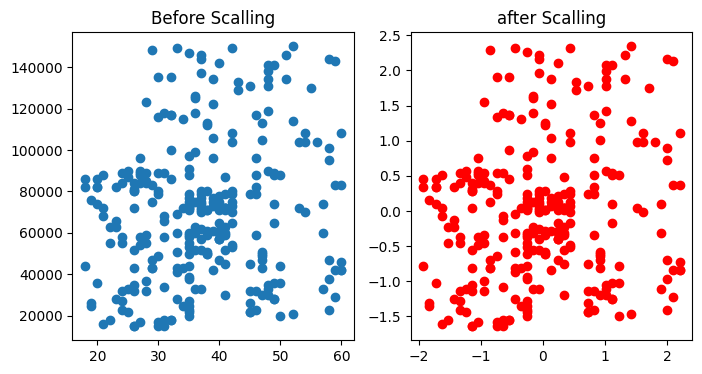

In [654]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,4))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('after Scalling')

In [655]:
data=pd.read_csv('/kaggle/input/my-salary/my_salary.csv')

In [656]:
data.head(2)

,Age,Salary,Purchase
0,25,45000,0
1,45,67000,1


In [657]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [658]:
x

,Age,Salary
0,25,45000
1,45,67000
2,32,47000
3,22,37000
4,50,55000
5,27,27000
6,28,47000
7,30,57000
8,43,38000


In [659]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [660]:
x_scaled=sc.transform(x)


In [661]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [662]:
knn=KNeighborsClassifier()
knn.fit(x,y)
y_pred=knn.predict(x)

In [663]:
from sklearn.metrics import accuracy_score

In [664]:
accuracy_score(y,y_pred)

0.5555555555555556

In [665]:
knn1=KNeighborsClassifier()
knn1.fit(x_scaled,y)
y_pred_scaled=knn1.predict(x_scaled)

In [666]:
accuracy_score(y,y_pred_scaled)

0.8888888888888888

In [667]:
de= DecisionTreeClassifier()
de.fit(x,y)
y_pred=de.predict(x)

In [668]:
de1=DecisionTreeClassifier()
de1.fit(x_scaled,y)
y_pred_scaled=de1.predict(x_scaled)

In [669]:
accuracy_score(y,y_pred)

1.0

In [670]:
accuracy_score(y,y_pred_scaled)

1.0

#  Normalization

In [671]:
nc=MinMaxScaler()
nc.fit(x_train)

MinMaxScaler()

In [673]:
x_train_scaled=nc.transform(x_train)
x_test_scaled=nc.transform(x_test)

In [674]:
x_train_scaled

array([[0.26190476, 0.44444444],
       [0.47619048, 0.48148148],
       [0.64285714, 0.08148148],
       [0.85714286, 0.68888889],
       [0.66666667, 0.05925926],
       [0.11904762, 0.0962963 ],
       [0.45238095, 0.44444444],
       [0.57142857, 0.37037037],
       [0.4047619 , 0.41481481],
       [0.78571429, 0.97037037],
       [0.5       , 0.6       ],
       [0.14285714, 0.54814815],
       [0.95238095, 0.59259259],
       [0.16666667, 0.05185185],
       [0.54761905, 0.32592593],
       [0.23809524, 0.54814815],
       [0.57142857, 0.48148148],
       [0.57142857, 0.68888889],
       [0.66666667, 0.6       ],
       [0.69047619, 0.72592593],
       [0.35714286, 0.0962963 ],
       [0.02380952, 0.07407407],
       [0.73809524, 0.54814815],
       [0.30952381, 0.        ],
       [0.28571429, 0.47407407],
       [0.71428571, 0.93333333],
       [0.33333333, 0.75555556],
       [0.45238095, 0.41481481],
       [0.        , 0.52592593],
       [0.57142857, 0.47407407],
       [0.

In [675]:
x_test_scaled

array([[0.66666667, 0.05185185],
       [0.97619048, 0.54074074],
       [0.23809524, 0.21481481],
       [0.71428571, 0.6       ],
       [0.26190476, 0.0962963 ],
       [0.28571429, 0.34814815],
       [0.69047619, 0.68148148],
       [0.26190476, 0.5037037 ],
       [0.52380952, 0.44444444],
       [0.57142857, 0.37037037],
       [0.4047619 , 0.37037037],
       [0.83333333, 0.14074074],
       [0.11904762, 0.24444444],
       [0.04761905, 0.05925926],
       [0.28571429, 0.53333333],
       [0.4047619 , 0.68888889],
       [0.80952381, 0.17037037],
       [0.66666667, 0.43703704],
       [0.5       , 0.2       ],
       [0.9047619 , 0.33333333],
       [0.0952381 , 0.08888889],
       [0.26190476, 0.48148148],
       [0.69047619, 0.05925926],
       [0.97619048, 0.45185185],
       [0.02380952, 0.02962963],
       [0.78571429, 0.05925926],
       [0.57142857, 0.48148148],
       [0.45238095, 0.28148148],
       [0.88095238, 0.81481481],
       [0.02380952, 0.04444444],
       [0.